In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
from summarytools import dfSummary
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import nltk
from keras.preprocessing.sequence import pad_sequences
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam

**GitHub**: https://github.com/Ofleitman/ML3_Final

*Kaggle Dataset**: https://www.kaggle.com/datasets/kazanova/sentiment140

**Kaggle Dataset Title**: *Sentiment140 dataset with 1.6 million tweets*

Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

## Machine Learning 3: Deep Learning Final Project - Sentiment Analysis

### Step 1: Gather data, determine the method of data collection and provenance
### Step 2: Identify a Deep Learning Problem

Sentiment Analysis is useful in a variety of applications including marketing, politics, employee satisfaction, company reviews, among others. My project focuses on identifying the sentiment (positive, neutral, or negative) of Twitter tweet data. Note, the training data has labels included. I will leverage the labels in supervised learning techniques, while removing the labels for unsupervised **deep learning techniques**. I will then compare the results and each models performance of how well each did in identifying tweet sentiment. The **type of task** is to produce an accurate and efficient model that would help with identifying tweet sentiment. The **motivation** behind this work is to find ways to accurately predict sentiment based on a combination of Natural Language Processing (NLP) and Machine Learning (ML) techniuqes due to its wide array of applications as outlined earlier.

### Data

**Reference**<br>
As noted earlier, the **dataset was collected from Kaggle**. However, the **provenance of the data and the way it was created** was done automatically rather than manually with human intervention. The authors of the data leveraged Twitter Search APIs to collect these tweets by using keyword search. The assumption of the data creation process was that any tweet with positive emoticons was marked 'positive', while the ones that represented negative emoticons were marked 'negative' as the target variable - *sentiment*.

**Disclaimer**:<br>
As I understand it, the data is real twitter tweets that may contain inappropriate language. The data was not reviewed for the contents of each tweet as it contains 1.6 million samples.

APA Citation:
<br>
Go, A., Bhayani, R. and Huang, L., 2009. Twitter sentiment classification using distant supervision. CS224N Project Report, Stanford, 1(2009), p.12.

**Data Description**<br>
- Format: **tabulated data**<br>
- Training Data size: **1,600,000 samples**<br>
- Feature size: 1 target variable followed by 4 features and an *ids* column <br>
- Features: ids column will be dropped as it will not add value to the sentiment analysis. The main column I will be focusing on is the text column and dropping the other columns such as user, date, flag, etc.

**Description of Features**

Outlined below is the list of variables included in the raw data and their associated description

|Index|Feature Name    |Description|
|:-   |:-|:-|
|0    |target           |Whether the tweet sentiment is positive (4) or negative (0)  
|1    |ids              |The id of the tweet (this is useful for unsupervised learning when assigning labels)
|2    |date             |The date the tweet was made and timestamp in UTC
|3    |flag             |Query (lyx) otherwise value is NO_QUERY
|4    |user             |The username of the account that made the tweet
|5    |text             |The actual contents (text) of the tweet

In [120]:
# load data
df = pd.read_csv("train.csv", encoding='latin1', header=None)

In [121]:
# print first 5 rows to get a sense of the data structure
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [123]:
# print first 5 rows to get a sense of the data structure
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [124]:
# below is just a reference of how data was submitted ot hackathon to compete, 
# we won't be using this data as we cannot submit it since the hackathon is over
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


### Step 3: Exploratory Data Analysis (EDA) - Inspect, Visualize, and Clean the Data

### Data Cleaning

**How and why I cleaned the data**: <br>
Before I can do exploratory data analysis (EDA), I must first ensure our data is clean and ready to be analyzed. As a first step, I explored whether there are any values that contain **blanks or null values**. Based on the dfSummary results, we don't have any missing data here. However, I did notice columns that will not be pertinent in our objectives of sentiment analysis. For example, the ids, date, flag, and user columns will be removed in `df_cleaned`. I have also noticed that the target (sentiment) is very well balanced. We have 50% that are tagged as positive and 50% tagged as negative sentiment in the dataset. I will not need to be concerned about treating for data imbalance. However, with text data, there is cleaning that needs to be done. These include removing punctuation, lower casing everything, removing special chracters such as '@' or '#' a.k.a hashtag symbols, stopwords, and links. For '@' mentions I decided to remove the username that followed completely as I don't believe this would help the model predict user sentiment. For '#' hashtags I decided to remove the symbol but retain the word that follows. I believe this would potentially help with model performance in classifying sentiment. I would also need to pre-process our text data after cleaning it by leveraging techniques such as word embeddings or TF-IDF to extract the important words before running it hrough the model step.
<br><br>
Additionally, I noticed that the target variable is unintuitive and headers are non-existent. To ensure we have a clean start, I will add appropriate headers to the cleaned dataset and encode the '4' value to a '1'. Therefore, '0' will be 'negative' and '1' will be 'positive'.
<br><br>
**Conclusions / discussions**: <br>
In summary, I removed the ids, date, flag, and user columns and retained the target along with the text itself. Additionally, I have actioned data type **munging** on the target variable (e.g., "sentiment") to ensure it is intuitive. For example, adjusting the values from '4' to a '1' for positive sentiment. I have added headers to each of the column names for staying organized as the data did not come with header names. Lastly, I leveaged the NLTK library to clean the text column from stopwords, punctuation, lowercase, symbols, etc. This allowed me to then produce several different types of visualizations on the cleaned data to perform EDA before diving into the model step.
<br><br>
**Visualizations**: <br>
What follows is visualizations of the data followed by the specific cleaning steps exercised as discussed in the aforementioned sections. I visualized the data leveraging a helpful function called `dfSummary` to check for null values, sample size, and whether data is balanced. Further, I checked the data types and ensured the object target variable was appropriately converted to integer so I can compare the results easier. The target variable was already in integer form.

In [125]:
# summarize all the columns and get a sense of their distribution via mini historgrams
# make a copy of the df in case we need to revert back
df_clean = df.copy()
dfSummary(df_clean)

/opt/anaconda3/lib/python3.11/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,0[int64],1. 02. 4,"800,000 (50.0%)800,000 (50.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBNxD9wROi96zgYy6GBL/QWjNAIZjZ3cxuow+Z0Ku19hh9xEziuq5fKaVl9CGzqbWeIYRvgntfTCkt+74/cs7P0cfM4rquz1LKchzHzcyI7U3RzCzn/Ny27Wf0MZO5jz5gNh+jD8D/QWyQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig0w0+/sYcPQhM+F5+cRa61lKWYyPAbvUWk8ze42+YyYMXvwYvHQKTPmgwpvNjzdbJ6Z8Tkz5+jHlc2DK58OUz49f7534UxcyxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yDDlc+B5+TDlc2LK14/Bix+Dl06/fpBq344fqoAAAAAASUVORK5CYII="">",0(0.0%)
2,1[int64],Mean (sd) : 1998817552.3 (193576073.6)min < med < max:1467810369.0 < 2002101855.0 < 2329205794.0IQR (CV) : 220143310.8 (10.3),"1,598,315 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACuElEQVR4nO3csY7aMByAcbscyECVHEKCjZWhUgdGHqIP20fowBOwMrFFQBREeikhoVMrVboCsRPwn/t+e8DDJww2tj6fzwrw3adHDwC4xcujB4B/aa27SqmOw0scz+fzW13j8QWhekRr3R0Oh9+CIBjYvsZ+v4+11t+fLVZC9UsnCILBfD5/C8Mwq/pwkiRmsVgMttttRylFqGhWGIbZaDT6afl4t9bBeIIfUxCBUCECoUIEQoUIhAoRCBUiECpEIFSIQKgQgVAhAqFCBEKFCIQKEQgVIhAqRCBUiECoEIFQIQKhQgRChQiEChEIFSIQKkQgVIjABRT4y+d7rwgVSin/770iVPzh9b1XhNoAhyk0KMuyXfd4qvD13itCrZnLFJrnuSmK4kuWZT+UUraxPCVCrZ/1FLperwfL5bJ3Op1aTQ1OKkJtiM0UGsfxU14ZWQfWUSECoUIEQoUIhAoRCBUiECpEIFSIQKgQgVAhAqFCBEKFCIQKEQgVIhAqROBvfqhNURRtpVSgtbZ5/OLBQEL9D8nHSR4hTdN2nudfJ5NJq9VqVT5zde1gIKG+g+Mk1R2PxxdjTG82m2Xj8Tiu8uwtBwMJ9X0cJ7HU7/dtDwdePN1AqBdwnMQf/OqHCIQKEbye+h3vQmrsHiTcn7ehut6F1OQ9SLg/b0NVDr+8m74HCffXaKiOU3dQlmU7DMPYZrmjKIpA2e+SfMhFe581Fqrr1O2ycO66S/JRF+191uQnqtM1hi4L5y67JK7vjWZcDdV1z9t26q5j4dx2l4RFe/9cDJU9b/ji2icqe97wwk3fUdnzlsPhP6Fer3T4vI6KilxWO3z/qnZTqEmSmKovfDgcjFJKpWlqoijq3fN5qe/tOu7dbvfZGNObTqf69fX1V5VnN5uNWa1WvSRJ+lEUHau+t8vYb+nrNxtNlTCMhaKYAAAAAElFTkSuQmCC"">",0(0.0%)
3,2[object],1. Mon Jun 15 12:53:14 PDT 20092. Fri May 29 13:40:04 PDT 20093. Fri May 22 05:10:17 PDT 20094. Mon Jun 15 13:39:50 PDT 20095. Fri Jun 05 14:13:07 PDT 20096. Fri Jun 05 11:05:33 PDT 20097. Mon Jun 01 12:25:21 PDT 20098. Fri May 22 08:34:27 PDT 20099. Mon Jun 15 10:39:32 PDT 200910. Mon Jun 01 15:19:07 PDT 200911. other,"20 (0.0%)17 (0.0%)17 (0.0%)17 (0.0%)16 (0.0%)16 (0.0%)15 (0.0%)15 (0.0%)15 (0.0%)15 (0.0%)1,599,837 (100.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
4,3[object],1. NO_QUERY,"1,600,000 (100.0%)",,0(0.0%)
5,4[object],1. lost_dog2. webwoke3. tweetpet4. Sally

In [126]:
# retain target and text columns
df_clean = df_clean.iloc[:,[0,5]]
# rename headers
df_clean = df_clean.rename(columns={0:'target',5:'text'})

In [127]:
# source: re-using my clean_up function I created from ML3 Week 4 assignment here with several tweaks
# helper function to preprocess the text
def clean(text):
    # convert all text to lower case
    text = text.lower()
    # remove http links
    text = re.sub(r'http\S+|https\S+', '', text)
    # remove symbols, digits, and currency symbols
    text = re.sub(r'\d+', '', text) 
    text = re.sub(r'[\$\£]', '', text)  
    text = re.sub(r'[.\-()\[\]]', '', text) 
    # remove @ and the user associated with the mention
    text = re.sub(r'@\w+', '', text)
    # remove # but retain the word that follows
    text = re.sub(r'#(\w+)', r'\1', text) 
    # remove all punctuation
    text = text.translate(str.maketrans("","",string.punctuation))
    # tokenize text
    tokens = word_tokenize(text)
    # remove stop words
    # get list of stop words from NLTK stopwords
    stop_words = set(stopwords.words('english'))
    # initailize empty list that will track the filtered tokens (e.g., removed stopwords)
    filtered_tokens = []
    # run for loop to check each token and only append the words that are not part of NLTK's stopwords
    for each_word in tokens:
        if each_word not in stop_words:
            filtered_tokens.append(each_word)
    # initialize lemmatizer
    lemmatizer = WordNetLemmatizer()
    # initialize empty list to store lemmatized tokens
    lemmatized_tokens = []
    # run for loop to check each filtered token from previous step - lemmatize and add to previously initialized
    # lemmatized list
    for each_word in filtered_tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(each_word))

    # return lemmatized tokens (individual words) into a single string
    return ' '.join(lemmatized_tokens)

### Text Result (Before Cleaning)

In [128]:
# view of data before cleaning text
idx = 175
df_clean['text'].iloc[idx]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [129]:
df_clean['clean_text'] = df_clean['text'].apply(clean)

### Cleaned Text Result

In [130]:
# view of data after cleaning text
idx = 175
df_clean['clean_text'].iloc[idx]

'im sorry youre go therapyfail'

### Data Encoding
I encoded or rather re-mapped the target variable from a '4' to a '1' for a more intuitive set-up below.

In [131]:
# re-map '4' to '1'
df_clean['target'] = df_clean['target'].replace(4,1)

In [132]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   target      1600000 non-null  int64 
 1   text        1600000 non-null  object
 2   clean_text  1600000 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.6+ MB


### Exploratory Data Analysis

**Feature description that make up the dataset**: <br>
I checked for **imbalances** within the target variable via countplot and **outliers** via boxplot for the tweet word counts. The data is well balanced. In fact, it is exactly 50% positive tweets and 50% negative tweets. No additional treatment on data imbalance is required in this case. Moreover, there are some noticeable outliers in terms of the word distribution of tweets. Specifically, the higher end (e.g., ~40 words or more). Majority of the tweets are between ~10 to ~20 words. I have also produced a wordcloud on the clean text data to get a sense of the word distribution. For example, the word 'love' seems to be one of the more prominent words. In terms of sentiment, I suspect it could go either way. Love can be about a break-up and resemble negative sentiment. Or, love could resemble positive sentiment if someone got engaged or married. It will be interesting if the model can distinguish amongst these words and how well it performs comparing supervised vs. deep learning techniques.
<br><br>
**Correlations**: <br>
Since I am dealing with a target variable and text, producing correlation matrices against features is not applicable to my dataset. However, I do take correlation into account within the data pre-processing step. In fact, "the GloVe model is trained on the non-zero entries of a global word-word co-occurence matrix, which tabluates how frequently words co-occur with one another in a given corpus."

*Source: https://nlp.stanford.edu/projects/glove/*

In addition, I reviewed the distribution of word length in positive vs. negative tweets. It appears both positive and negative tweets have a similar slightly left skewed distribution.
<br><br>
**Transformation requirements for data** <br>
In the previous step, we re-mapped the target variable from '4' to '1' for ease of readability. In addition, we added column headers that were not previously available. Lastly, we cleaned the text data using a custom clean function that looks at a variety of elements such as lower case, punctuation, stopwords, among others previously outlined. To ready the data into the models, we will be leveraging the Global Vectors for Word Representation (GloVe) technique in preparing our data for the model step through word embeddings. The reason I chose to go with GloVe is twofold - one, it is supposedly more computationally efficient than Word2Vec and two, I wanted more experience with techniques other than TF-IDF which I have already worked with on past projects.
<br><br>
**Hypothesis for data transformation**
Given our data is in text format, we will be leveraging GloVe method to transform it before passing it through both supervised  and deep learning techniques. I hypothesize that the model will perform better under deep learning methods rather than supervised learning due to their ability to extract complex patterns / features. Since we are dealing with text data that may contian lots of noise such as in correct spelling of words, slang, etc. I believe supervised learning models will struggle relative to deep learning techniques.
<br><br>
**Outlier analysis**
As described in the feature description section, the data has several outliers when viewing the word distribution of tweets. However, we will retain these outliers as they could help the model performance in identifying whether a tweet has positive or negative sentiment.
<br><br>
**Feature importance hypothesis**
Since the only feature in my dataset is text that I will be using, my hypothesis is that words by themselves would not be good predictors of a tweet's sentiment. It is how the word is used relative to its context that would better predict sentiment. As previously outlined, the word 'love' could mean break-up (negative sentiment) or engagement / marriage (positive sentiment).

Counts: target
0    800000
1    800000
Name: count, dtype: int64


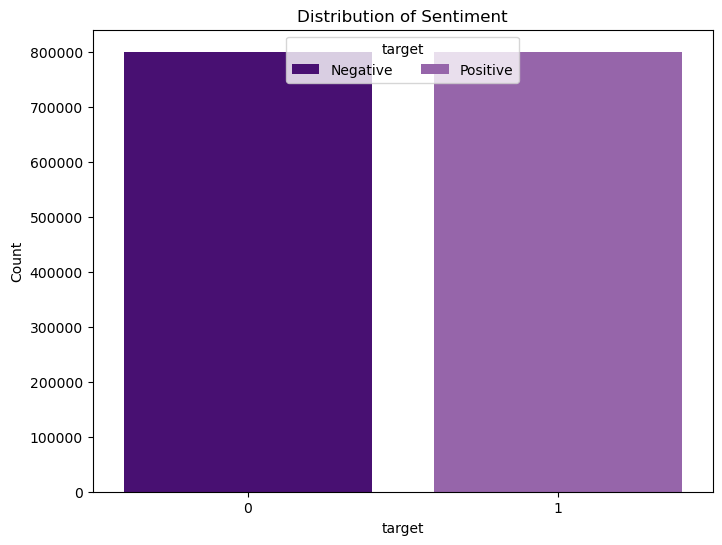

In [133]:
# check for data imbalance by counting how many 1s and 0s we have in the target variable
print(f"Counts: {df_clean['target'].value_counts()}")

# count plot
plt.figure(figsize=(8, 6))
custom_palette = ['#4B0082', '#9B59B6']
sns.countplot(x='target', data=df_clean, hue='target', palette=custom_palette)
plt.title('Distribution of Sentiment')
plt.xlabel('target')
plt.ylabel('Count')
plt.legend(title='target', labels=['Negative', 'Positive'], loc='upper center', ncol=4)
plt.xticks(rotation=0)
plt.show()

### Data Visualization of Features
Since a lot of my data is boolean form, boxplots don't make a lot of sense here as they are more suited for continuous data. I will create countplots for each of the features instead as shown below to get a sense of the distributions.

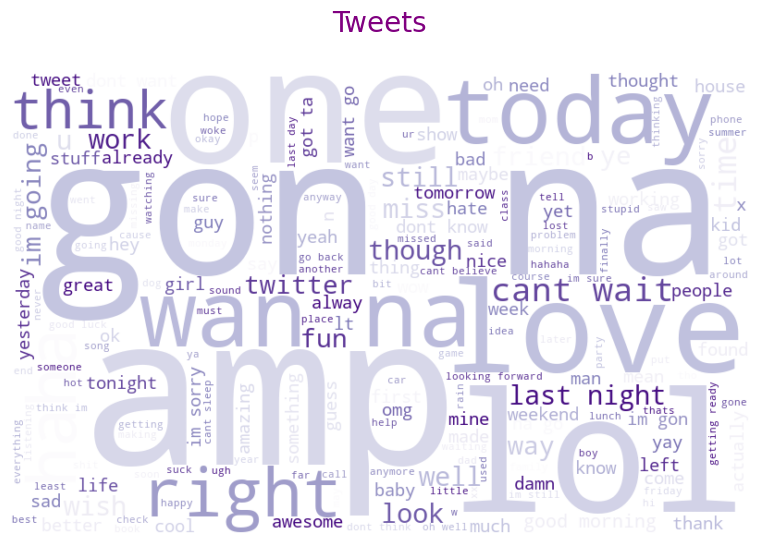

In [134]:
text = ' '.join(df_clean.clean_text)
wc = WordCloud(width = 800, height = 500, background_color = 'white', colormap = 'Purples').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.title('Tweets\n', fontsize=20, color = 'purple')
plt.axis('off')
plt.show()

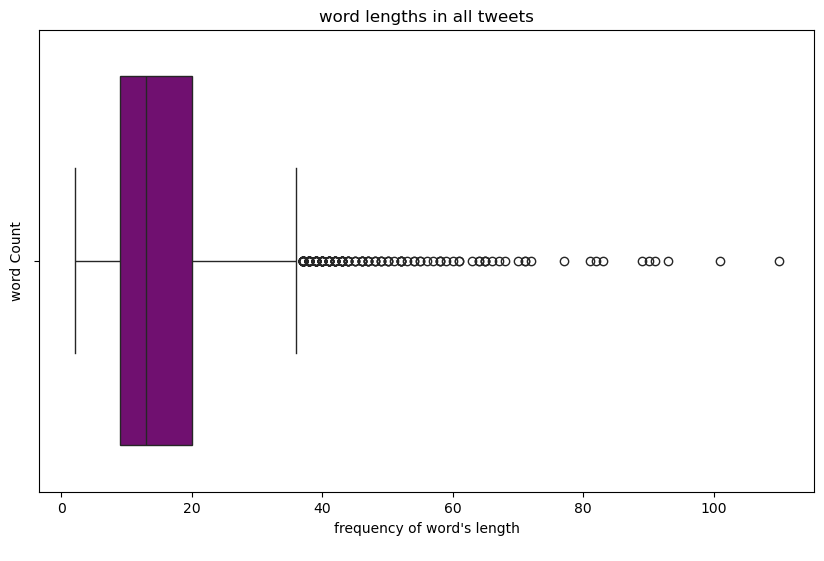

In [135]:
# tweet lengths
tweet_length = []
for i in range(len(df_clean.text)):
    tweet_length.append(len(df_clean.text[i].split(' ')))

# produce df from previously initialized list
length_df = pd.DataFrame({'tweet_length': tweet_length})

# plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=length_df, x='tweet_length', color='purple')
plt.ylabel('word Count')
plt.xlabel("frequency of word's length\n")
plt.title('word lengths in all tweets')
plt.show()

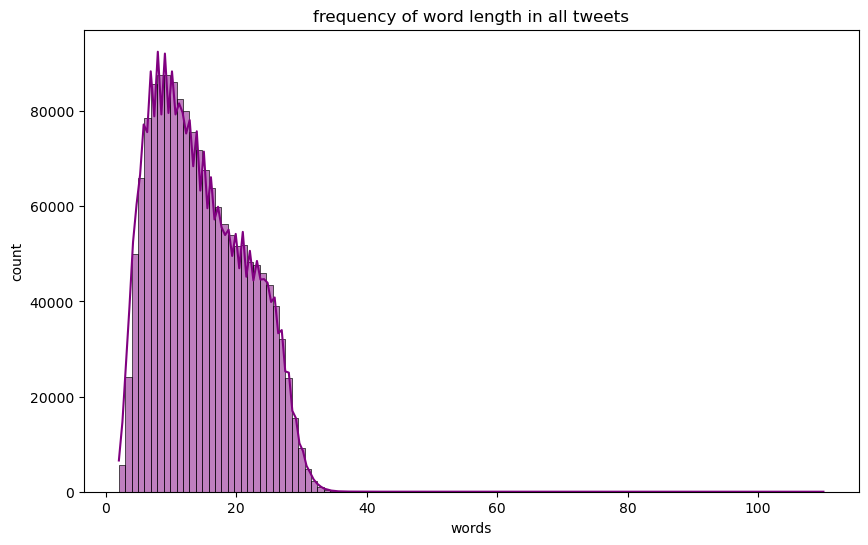

In [136]:
# leveraged code from my ML3 Week 4 assignment
plt.figure(figsize=(10,6))
sns.histplot(tweet_length, color='purple',bins=max(tweet_length),kde=True)
plt.ylabel('count')
plt.xlabel('words')
plt.title('frequency of word length in all tweets')
plt.show()

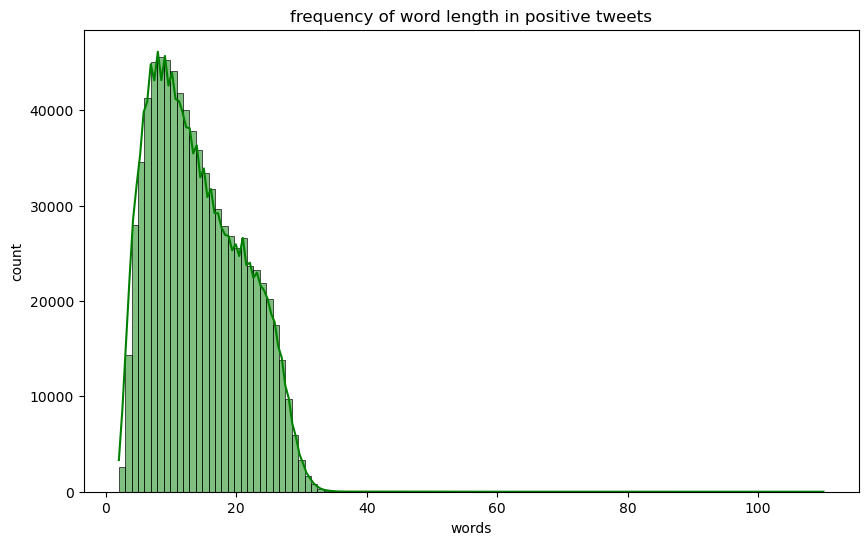

In [137]:
# leveraged code from my ML3 Week 4 assignment

df_pos_filter = df_clean[df_clean['target'] == 1]

tweet_length_pos=[]
for i in range(len(df_pos_filter)):
    tweet_length_pos.append(len(df_pos_filter.text.iloc[i].split(' ')))

plt.figure(figsize=(10,6))
sns.histplot(tweet_length_pos, color='green',bins=max(tweet_length_pos),kde=True)
plt.ylabel('count')
plt.xlabel('words')
plt.title('frequency of word length in positive tweets')
plt.show()

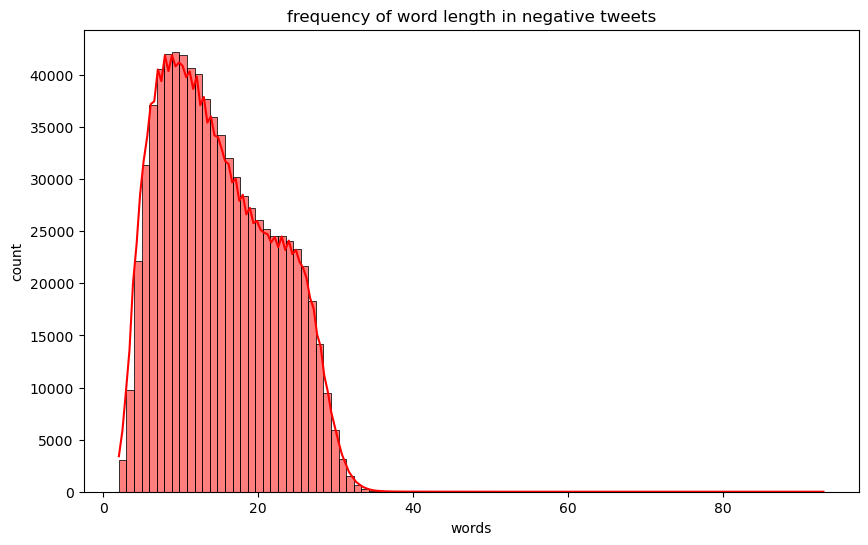

In [138]:
# leveraged code from my ML3 Week 4 assignment

df_neg_filter = df_clean[df_clean['target'] == 0]

tweet_length_neg=[]
for i in range(len(df_neg_filter)):
    tweet_length_neg.append(len(df_neg_filter.text.iloc[i].split(' ')))

plt.figure(figsize=(10,6))
sns.histplot(tweet_length_neg, color='red',bins=max(tweet_length_neg),kde=True)
plt.ylabel('count')
plt.xlabel('words')
plt.title('frequency of word length in negative tweets')
plt.show()

### Step 4: Perform Analysis Using Deep Learning Models of your Choice, Present Discussion, and Conclusions

### Data Preprocessing (GloVe):
I have chosen to produce 2 supervised learning models and 2 CNN_hyper_tuned_hyper_tuned deep learning models, one of which incorporates hyperparameter tuning. However, before I jump into the models themselves, first, I need to pre-process the data. I decided to leverage GloVe technique. Instead of training word embeddings myself, I leveraged a pre-trained word embeddings from Stanford (sourced in References section). As a first step, I leveraged a function from a medium tutorial that produces GloVe embeddings from the Standford pre-trained text file. I used a file that has 300 dimensions. The function outputs the results into `embeddings`. I then split the data into 20% test and 80% training sets. After splitting the data, I tokenize the text data into individual words leveraging NLTK's `word_tokenize` function. I then create a `word_idx` mapping which assigns an index for each of the words found in the training tokens. This mapping will then be leveraged as a look up against the GloVe embeddings created earlier. Next, I created an embedding matrix with 300 dimensions and the number of unique words kept. This matrix is then assigned with the relevant GloVe vectors by iterating over each word. Finally, I converted the tokens into sequences with padding by leveraging Keras `pad_sequences` function. The purpose of this transformation is to ensure we can feed it into the CNN_hyper_tuned_hyper_tuned deep learning model.

I leveraged a pre-trained word embedding offered by Standford AI to implement within my word embedding helper function below.

*Source: https://nlp.stanford.edu/projects/glove/*

In [139]:
# to help me with the embeddings portion of implementing GloVe I leveraged the tutorial
# outlined in the medium article here sourced in the references section
# source: https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db

def we(file):
    embeddings = {}
    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coef = np.asarray(values[1:], dtype='float32')
            embeddings[word] = coef
    return embeddings

glove = 'glove.6B.300d.txt'
embeddings = we(glove)

After creating the embeddings, I split the train and test set 80/20, created tokens using NLTK's `word_tokenize` function and produced a mapping of each word so that I can then create a matrix to hold the GloVe vectors of each word in the dataset.

In [140]:
# split training data 20% test 80% train
X, y = df_clean['clean_text'], df_clean['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# tokenize text using word_tokenize from NLTK library - what it does is it produces a dataframe containing
# tweets from training set where each tweet is transformed into tokens (e.g., words)
train_tokens = X_train.apply(word_tokenize)
test_tokens = X_test.apply(word_tokenize)

# create a mapping of each unique word to an index where I can then use to reference the GloVe embeddings
# created earlier - put differently, a way to efficiently do a look up
word_idx = {}
for each_token in train_tokens:
    for each_word in each_token:
        if each_word not in word_idx:
            # the + 1 at the end is to begin idx from 1 and not 0
            word_idx[each_word] = len(word_idx) + 1

Here I initialized 300 dimensions, consistent with the Stanford pre-trained embeddings I leveraged outlined earlier, and intialized an empty matrix - `embedding_matrix` with the length of the word mapping created above.

In [141]:
# leverage word index created previously to produce embedding matrix by leveraging embeddings 
# created from pre-trained GloVe word embeddings
# using 300 since the .txt we imported in `we` function earlier is based on 300 dimensions
embedding_dimension = 300
# initialize matrix that will hold the GloVe vectors for each word in data
embedding_mtx = np.zeros((len(word_idx) + 1, embedding_dimension))

Then I filled the matrix with GloVe vectors for each word from train data.

In [142]:
# now I fill the embeddings matrix with the GloVe vectors for each word in train data
# via a for loop
for each_word, idx in word_idx.items():
    embedding_vec = embeddings.get(each_word)
    if embedding_vec is not None:
        embedding_mtx[idx] = embedding_vec

Finally, I transformed the tokenized words into padded sequences leveraging Keras `pad_sequences` function. This is required as I will use it as a input into the CNN_hyper_tuned_hyper_tuned deep learning models. 

In [143]:
# convert tokens to sequences of idx's for use in CNN_hyper_tuned_hyper_tuned model using keras library
max_num_words = 30

# initialize train seq list
train_seq = []
test_seq = []

# to produce training tokens
for tokens in train_tokens:
    # initialize list to hold current sequence
    seq = []
    for each_word in tokens:
        if each_word in word_idx:
            seq.append(word_idx[each_word])
    train_seq.append(seq)

# to produce test tokens
for tokens in test_tokens:
    # initialize list to hold current sequence
    seq = []
    for each_word in tokens:
        if each_word in word_idx:
            seq.append(word_idx[each_word])
    test_seq.append(seq)

# pad sequences
train_seq = pad_sequences(train_seq, maxlen=max_num_words)
test_seq = pad_sequences(test_seq, maxlen=max_num_words)

The block below focuses on calculating the average vector for set of tokens via a helper function. The train and test averages will be utilized as n input in the supervised learning models - Logistic Regression and Random Forest.

In [144]:
def avg_word_vec(tokens, model):
    kept_words = []
    for each_word in tokens:
        if each_word in model:
            kept_words.append(model[each_word])
    return np.mean(kept_words, axis = 0) if kept_words else np.zeros(300)

train_avg = np.zeros((len(X_train), 300))
for i in range(len(train_tokens)):
    train_avg[i] = avg_word_vec(train_tokens.iloc[i], embeddings)

test_avg = np.zeros((len(X_test), 300))
for i in range(len(test_tokens)):
    test_avg[i] = avg_word_vec(test_tokens.iloc[i], embeddings)

### Supervised Models

**Logistic Regression**:<br>
First, I chose to produce a logistic regression model to start off as a base and see how the model performs. I was running into an error where the Logistic Model ran out of memory so I capped the `max_iter` at 500. The model's accuracy produced a respectable 0.71.

**Random Forest**:<br>
Second, I chose to try a basic Random Forest model with 100 estimators and compare its accuracy against the Logistic Regression model.

**CNN Deep Learning Model 1**:<br>
The **architecture** I chose for the first deep learning model is simple compared to the hyperparameter tuned version. First, the input layer incorporates the word index, embedding dimensions and embedding matrix based on the pre-train Stanford data. I turned `trainable=False` to ensure the weights are not updated. The logic here is because the pre-trained Stanford data already has the weights and I want to retain these weights without updating them in the CNN deep learning model. I then added 1 convolution layer with 128 filters and a kernel size of 5 with relu as an activation. I wrapped this up with a Global Max Pooling and added a dense layer of 5 thereafter with sigmoid activation since we are classifying a binary 0 or 1. The model uses default adam optimizer settings with accuracy as the metric of measure. The loss is binary crossentropy. After fitting the model, I wanted to see how it performed relative to the simpler supervised learning models.

**CNN Deep Learning Model 2 - Hyperparameter Tuned**:<br>
For the second model's architecture I wanted to experiement with hyperparameter tuning and adding additional layers. Specifically, I added 3 convolutional layers with BatchNormalization, LeakyReLU activation, and incorporated a Dropout of 0.2. Additioanlly, I customized the Adam optimizer's learning rate at 0.001. Each convolution layer had a different set of filters. I started with 128, followed by 64 and ended at 32.

### Initialize and train Logistic Regression model

In [145]:
# train logistic regression model
model_logistic = LogisticRegression(max_iter=500)
model_logistic.fit(train_avg, y_train)

# evaluate accuracy based on test set
y_pred_logistic = model_logistic.predict(test_avg)
acc_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression - Accuracy: {acc_logistic:.4f}')

Logistic Regression - Accuracy: 0.7171


In [200]:
train_acc_logistic = accuracy_score(y_train, model_logistic.predict(train_avg))
print(f'Logistic Regression - Train Accuracy: {train_acc_logistic:.4f}')

Logistic Regression - Train Accuracy: 0.7173


### Initialize and train Random Forest model

In [146]:
# train random forest
model_rf = RandomForestClassifier(n_estimators=100)
hist_model_rf.fit(train_avg, y_train)

# evaluate accuracy based on test set
y_pred_rf = model_rf.predict(test_avg)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest - Accuracy: {acc_rf:.4f}')

Random Forest Accuracy: 0.7180


In [201]:
train_acc_rf = accuracy_score(y_train, model_rf.predict(train_avg))
print(f'Random Forest - Train Accuracy: {train_acc_rf:.4f}')

Random Forest - Train Accuracy: 0.9833


### Initialize and train CNN (Deep Learning) model

In [203]:
# CNN model architecture
model_CNN = Sequential()
model_CNN.add(Embedding(input_dim=len(word_idx) + 1, 
                    output_dim=embedding_dimension, 
                    weights=[embedding_mtx], 
                    input_length=max_num_words, 
                    trainable=False))
model_CNN.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(5, activation='relu'))
model_CNN.add(Dense(1, activation='sigmoid'))

# compile CNN model
model_CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# print model summary
model_CNN.summary()

# fit the model
hist_CNN = model_CNN.fit(train_seq, y_train, epochs=5, batch_size=64)

# produce accuracy against test data
loss_train, train_accuracy = model_CNN.evaluate(train_seq, y_train)
print(f'CNN Model Train Accuracy: {train_accuracy:.4f}')
loss, test_accuracy = model_CNN.evaluate(test_seq, y_test)
print(f'CNN Model Test Accuracy: {test_accuracy:.4f}')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 300)           107156700 
                                                                 
 conv1d_7 (Conv1D)           (None, 26, 128)           192128    
                                                                 
 global_max_pooling1d_3 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 5)                 645       
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 107349479 (409.51 MB)
Trainable params: 192779 (753.04 KB)
Non-trainable params: 107156700 (408.77 MB)
___

### Initialize and train CNN Hyperparameter Tuned (Deep Learning) model

In [204]:
# CNN hyperparameter model architecture
model_CNN_hyper_tuned = Sequential()

# input
model_CNN_hyper_tuned.add(Embedding(input_dim=len(word_idx) + 1, 
                    output_dim=embedding_dimension, 
                    weights=[embedding_mtx], 
                    input_length=max_num_words, 
                    trainable=False))

# layer 1
model_CNN_hyper_tuned.add(Conv1D(filters=128, kernel_size=5))
model_CNN_hyper_tuned.add(BatchNormalization())                          
model_CNN_hyper_tuned.add(LeakyReLU(alpha=0.1))
model_CNN_hyper_tuned.add(Dropout(0.2))

# layer 2
model_CNN_hyper_tuned.add(Conv1D(filters=64, kernel_size=3))
model_CNN_hyper_tuned.add(LeakyReLU(alpha=0.1))
model_CNN_hyper_tuned.add(Dropout(0.2))
model_CNN_hyper_tuned.add(BatchNormalization())

#layer 3
model_CNN_hyper_tuned.add(Conv1D(filters=32, kernel_size=1))
model_CNN_hyper_tuned.add(LeakyReLU(alpha=0.1))
model_CNN_hyper_tuned.add(Dropout(0.2))
model_CNN_hyper_tuned.add(BatchNormalization())

# output
model_CNN_hyper_tuned.add(GlobalMaxPooling1D())
model_CNN_hyper_tuned.add(Dense(5, activation='relu'))                        
model_CNN_hyper_tuned.add(Dropout(0.2))                          
model_CNN_hyper_tuned.add(Dense(1, activation='sigmoid'))

# compile CNN_hyper_tuned model
model_CNN_hyper_tuned.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# print model summary
model_CNN_hyper_tuned.summary()

# fit the model
hist_CNN_tuned = model_CNN_hyper_tuned.fit(train_seq, y_train, epochs=5, batch_size=64)

# produce accuracy against test data
loss_train_hyper, train_accuracy_hyper = model_CNN_hyper_tuned.evaluate(train_seq, y_train)
print(f'CNN_hyper_tuned Model - Train Accuracy: {train_accuracy_hyper:.4f}')
loss_test_hyper, test_accuracy_hyper = model_CNN_hyper_tuned.evaluate(test_seq, y_test)
print(f'CNN_hyper_tuned Model - Test Accuracy: {test_accuracy_hyper:.4f}')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 30, 300)           107156700 
                                                                 
 conv1d_8 (Conv1D)           (None, 26, 128)           192128    
                                                                 
 batch_normalization_4 (Bat  (None, 26, 128)           512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 26, 128)           0         
                                                                 
 dropout_4 (Dropout)         (None, 26, 128)           0         
                                                                 
 conv1d_9 (Conv1D)           (None, 24, 64)            24640     
                                                      

### Results and Analsyis

Based on the **summary of results** noted below, the supervised learning models performed at a lower accuracy compared to that of the deep learning models with convolution layers. This observation is also consistent with F1-Scores. However, looking into the results more closely, I noticed that between Logistic Regression and Random Forest supervised models, the Logistic Regression generalized better to new data compared to that of the Random Forest model. This signals that Random Forest may have overfitted during the training step. For example, the accuracy of Random Forest was 0.9833 compared to 0.7180 with new data. Meanwhile, the Logistic Regression model performed similarly at 0.71 with training vs. test data. In terms of the **deep learning** model results, the CNN model without hyperparameter tuning had an accuracy of 0.8189 against the training set and 0.7768 against the test set. Although there may have been slight overfitting signals, the performance was better compared to Logistic Regression. Lastly, the CNN model with **hyperparameter** tuning generalized much better when comparing training accuracy (0.7869) and test accuracy (0.7755). The hyperparameter tuned model performed similarly to the untuned model; however, because of the better generalization of the hyperparameter tuned model, that is the model I would recommend to go with from the 4 models reviewed below.

**Several reasons why deep learning models performed better than supervised learning models** include feature extraction / learning, regularization, and robust to noisy data. Deep learning models can effectively learn about features from raw data without the need of feature engineering. Because text is complex, I believe this is one reason why the deep learning model faired better compared to supervised models such as Logistic Regression and Random Forest. Additionally, regularization techniques were implemented in the deep learning hyperparameter tuned model including Dropout and Batch Normalization. This is evident when we compare it to the non-hyperparameter tuned deep learning model. Dropout and Batchnormalization help the model with the overfitting problem. Lastly, deep learning models are more robust to noise. This is likely because of the powerful feature extraction / learning capabilties for neural network architecture compared to a simpler supervised learning model such as Logistic Regression.

In my **hypothesis**, I predicted that deep learning methods would outperform supervised learning methods. And, in someways they did. However, I was surprised by how well a simple logistic regression model did compared to the deep learning methods.
<br><br>
|Model|Type|Train Accuracy|Test Accuracy|Test Weighted Avg F1-Score
|:-|:-|:-|:-|:-|
|Logistic Regression|Supervised|0.7173|0.7171|0.7171
|Random Forest|Supervised|0.9833|0.7180|0.7180
|CNN|Deep Learning|0.8189|0.7768|0.7768
|CNN - Hyperparameter Tuned|Deep Learning|0.7869|0.7755|0.7741

### Predict Results based on Test Data for each Model

In [205]:
# store predictions
y_pred_logistic = model_logistic.predict(test_avg)
y_pred_rf = model_rf.predict(test_avg)
y_pred_cnn = model_CNN.predict(test_seq)
y_pred_cnn_hyper_tuned = model_CNN_hyper_tuned.predict(test_seq)

# use predictions to create confusion matrices
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_cnn = confusion_matrix(y_test, (y_pred_cnn > 0.5).astype(int))
cm_cnn_hyper_tuned = confusion_matrix(y_test, (y_pred_cnn_hyper_tuned > 0.5).astype(int))

10000/10000 [==============================] - 27s 3ms/step


### Visualize Results via Confusion Matrices

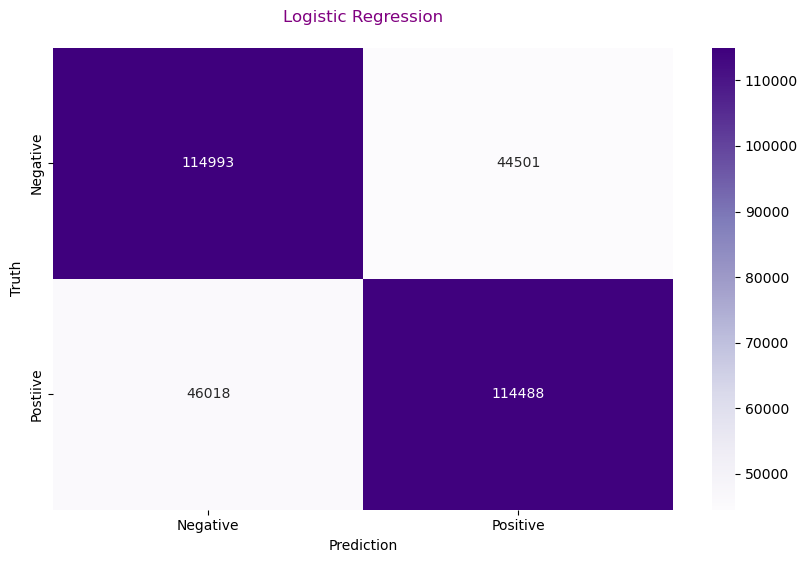

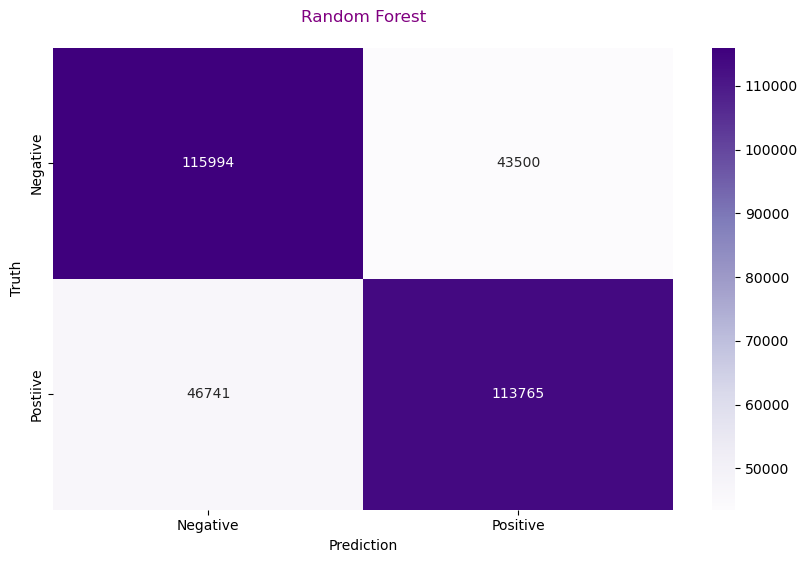

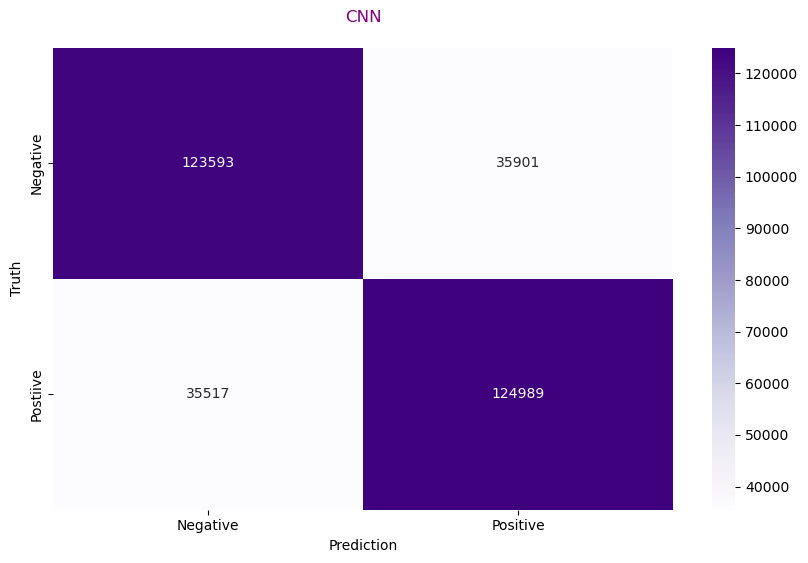

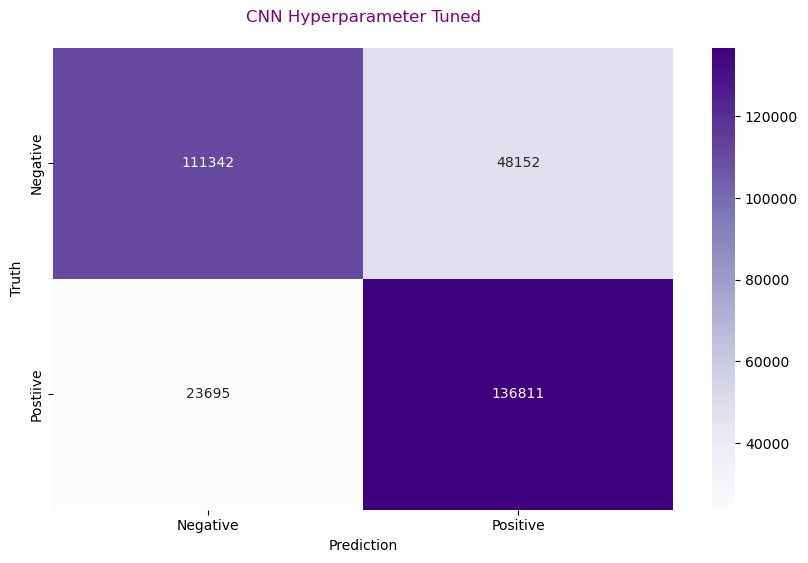

In [206]:
# helper function to plot confusion matrix
def cm_plot(cm, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Purples', 
                xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Postiive'])
    plt.title(f"{title}\n", color = 'Purple')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.show()

# plot confusion matrices for each model using helper function
cm_plot(cm_logistic, 'Logistic Regression')
cm_plot(cm_rf, 'Random Forest')
cm_plot(cm_cnn, 'CNN')
cm_plot(cm_cnn_hyper_tuned, 'CNN Hyperparameter Tuned')

### Review Results via Classification Report

In [232]:
# logistic regression
print(f"\033[1mLogistic Regression Classification Matrix\033[0m\n")
print(classification_report(y_test, y_pred_logistic, digits = 4))

# Random Forest
print(f"\n\033[1mRandom Forest Classification Matrix\033[0m\n")
print(classification_report(y_test, y_pred_rf, digits = 4))

# CNN
print(f"\n\033[1mCNN (Deep Learning) Classification Matrix\033[0m\n")
y_pred_cnn_cr = (y_pred_cnn > 0.5).astype(int)
print(classification_report(y_test, y_pred_cnn_cr, digits = 4))

# CNN Hyper-tuned
print(f"\n\033[1mCNN (Deep Learning) Hyperparameter Tuned Classification Matrix\033[0m\n")
y_pred_cnn_hyper_tuned_cr = (y_pred_cnn_hyper_tuned > 0.5).astype(int)
print(classification_report(y_test, y_pred_cnn_hyper_tuned_cr, digits = 4))

Logistic Regression Classification Matrix

              precision    recall  f1-score   support

           0     0.7142    0.7210    0.7176    159494
           1     0.7201    0.7133    0.7167    160506

    accuracy                         0.7171    320000
   macro avg     0.7171    0.7171    0.7171    320000
weighted avg     0.7172    0.7171    0.7171    320000


Random Forest Classification Matrix

              precision    recall  f1-score   support

           0     0.7128    0.7273    0.7199    159494
           1     0.7234    0.7088    0.7160    160506

    accuracy                         0.7180    320000
   macro avg     0.7181    0.7180    0.7180    320000
weighted avg     0.7181    0.7180    0.7180    320000


CNN (Deep Learning) Classification Matrix

              precision    recall  f1-score   support

           0     0.7768    0.7749    0.7758    159494
           1     0.7769    0.7787    0.7778    160506

    accuracy                         0.7768    320000
   

### Extract Deep Learning Model Accuracy / Loss Metrics

In [212]:
# CNN model history
train_acc_CNN = hist_CNN.history['accuracy']
train_loss_CNN = hist_CNN.history['loss']
epochs_CNN = range(1, len(train_acc_CNN) + 1)

# CNN model tuned history
train_acc_CNN_hyper = hist_CNN_tuned.history['accuracy']
train_loss_CNN_hyper = hist_CNN_tuned.history['loss']
epochs_CNN_hyper = range(1, len(train_acc_CNN_hyper) + 1)

### Plot Deep Learning Model Accuracy / Loss

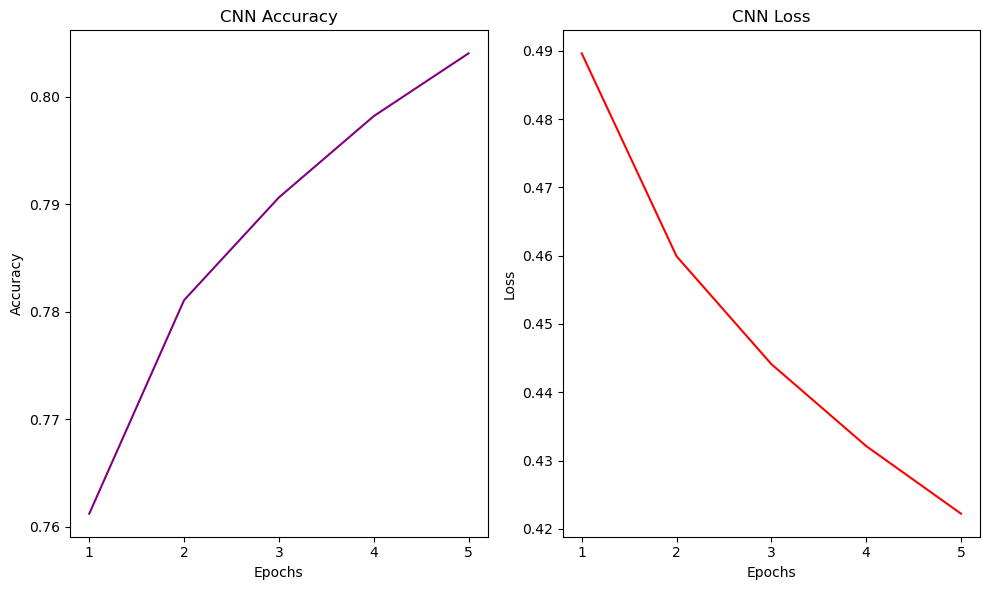

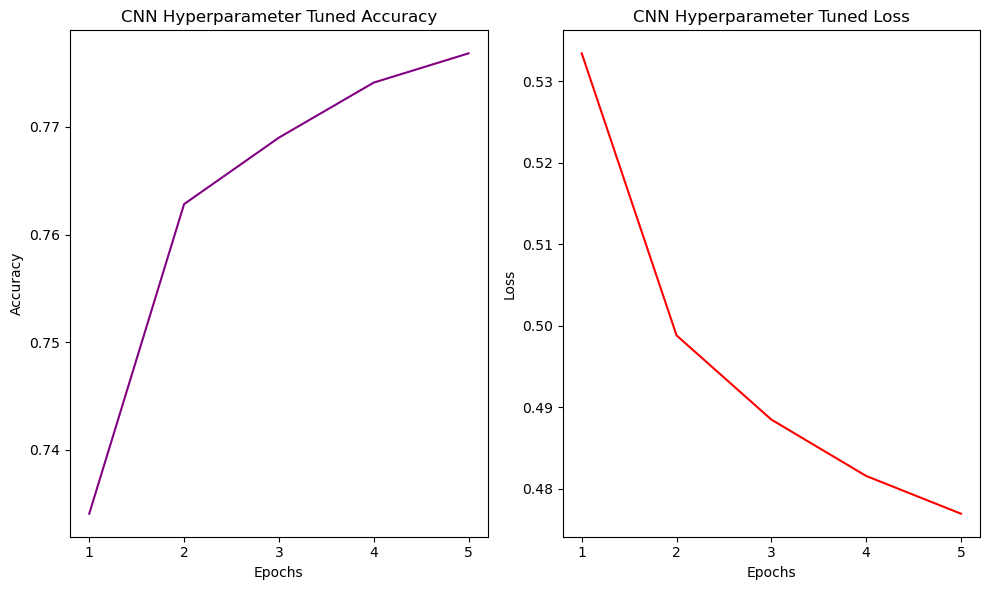

In [225]:
# plot CNN
plt.figure(figsize=(10, 6))

# CNN acc plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc_CNN, color='purple')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)

# CNN loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_CNN, label='Train Loss', color='red')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)

# show plots
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

# CNN hyper acc plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc_CNN_hyper, label='Train Accuracy', color='purple')
plt.title('CNN Hyperparameter Tuned Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)

# CNN hyper loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_CNN_hyper, label='Train Loss', color='red')
plt.title('CNN Hyperparameter Tuned Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)

# show plots
plt.tight_layout()
plt.show()


### Discussion and Conclusion

**Discussion of learning and takeaways:**
<br>
After exploring the data, applying cleaning techniques, transforming, preprocessing and conducting EDA on the trian data, I was interested in comparing how well supervised learning models would compare against deep learning convolutional neural networks. As outlined in the results and analysis section, deep learning methods outperformed supervised learning methods on tweet data. Unsurprisingly, implementing regularization techniques into my deep learning model, it was evident that the model generalized better to new data compared to the deep learning model that did not use regularization. I have also incorporated LeakyReLU for the purposes of mitigating the vanishing gradient problem that the untuned model may be prone to when just using the ReLU activation functions within the CNN model architected above.
<br><br>
In this project, I was able to learn how to implement GloVe embeddings based on pre-trained word embeddings provided by Stanford. Specifically, I used the 300 dimension vectors and was able to implement a form of transfer learning into each of my models. Another key takeaway is that understanding how to troubleshoot whether a model is convering and overfitting are key. This helps with guiding what the next step would be. Perhaps, considering the addition of regularization techniques as an example. Finally, it is important not just to look at accuracy or F1-Score results. It's also important to look at other measures such as training / loss graphs, test vs. validation results, and confusion matrices, where appropriate. For example, when I reviewed the confusion matrices I noticed that the CNN model had more false negatives while the CNN hyperparamter tuned model had more false positives. Depending on the task at hand, it is prudent to ensure you are comfortable with the results of the model you choose to move forward with holistically and not based on one measure. 
<br><br>
**Discussion of why something didn't work:**
<br>
Implementing GloVe technique was challenging at first. There are a number of steps that need to be followed in order to implement the technique into supervised and deep learning models. Both have specific pre-processing steps that need to be followed. I was initially having challenges in producing the `word_idx` and `embedding_mtx`. Specifically, I was getting 0 results in the arrays when printing out these variables. However, after further research combined with trial and error I was able to get it to work.
<br>
Additionally, as outlined earlier, perhaps the supervised learning models struggled relative to the deep learning models due to the lack of hyperparameter tuning. It would be wise to tune these models before a true comparison is made. Though I suspect deep learning will prevail in this exercise due to the complex nature of patterns that must be learned from the text data.
<br><br>
**Suggested ways to improve:**
<br>
Some suggested way to improve the models performance would be to further iterate on hyperparameter tuning. In addition, I would be interested in exploring whether removing the outliers identified earlier would help with the model performance. Another idea is to clean the text from the use of contractions. For example, *aren't* to *are not* before feeding through the model. I wonder if there is something that I can design to pre-process and standardize the text from slang terms and the way it is written. For example, the younger generation may express *suspicious* as *sus*. These are the types of elements that could be considered to further hone in on cleaning the text before it is passed through the model step.
<br><br>

### Step 5: Produce Deliverables: High Quality, Organized Jupyter Notebook Report, Video presentation, and GitHub Repository

GitHub repository link: https://github.com/Ofleitman/ML3_Final

The video presentation is uploaded directly in the assignment

### References:
https://www.kaggle.com/datasets/kazanova/sentiment140/<br>
https://saturncloud.io/glossary/global-vectors-for-word-representation/<br>
https://nlp.stanford.edu/projects/glove/<br>
https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db<br>
https://numpy.org/doc/stable/ <br> 
https://pandas.pydata.org/docs/ <br> 
https://seaborn.pydata.org/ <br> 
https://pypi.org/project/summarytools/ <br> 
https://docs.python.org/3/library/re.html <br> 
https://docs.python.org/3/library/string.html <br> 
https://www.nltk.org/api/nltk.tokenize.html <br> 
https://www.nltk.org/api/nltk.corpus.html <br> 
https://www.nltk.org/api/nltk.stem.html <br> 
https://matplotlib.org/stable/contents.html <br> 
https://github.com/amueller/word_cloud <br> 
https://scikit-learn.org/stable/modules/cross_validation.html <br> 
https://www.nltk.org/ <br> 
https://keras.io/api/preprocessing/sequence/#pad_sequences-function <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html <br> 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html <br> https://keras.io/api/models/sequential/ <br> https://keras.io/api/layers/core_layers/embedding/ <br> https://keras.io/api/layers/convolution_layers/convolution1d/ <br> https://keras.io/api/layers/pooling_layers/global_max_pooling1d/ <br> 
https://keras.io/api/layers/core_layers/dense/ <br> 
https://keras.io/api/layers/core_layers/dropout/ <br> 
https://keras.io/api/layers/normalization_layers/batch_normalization/ <br> https://keras.io/api/layers/activation_layers/leaky_relu/ <br> 
https://keras.io/api/optimizers/adam/ <br>